# Trabajo Práctico N6. Color

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

In [16]:
#Funciones auxiliares

def myplotimg (img,vmin=0,vmax=1,title=None):
  plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)
  if title != None:
    plt.title(title)
  plt.axis("off")
  plt.show()
  return

def show_side_by_side(imgs, subtitles = None, title = None, vmin=0, vmax=1, **kwargs):
    fig, axes = plt.subplots(1, len(imgs), **kwargs)
    if len(imgs) == 1:
        axes = [axes]
    if title is not None:
        fig.suptitle(title, y=0.8)
    if subtitles is None:
        subtitles = [None for _ in imgs]
    for ax, img, subtitle in zip(axes, imgs, subtitles):
        if subtitle is not None:
            ax.set_title(subtitle)
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Load images

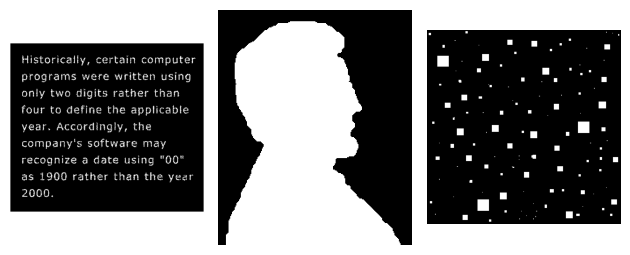

In [17]:
def imread(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype(bool)

broken_text = imread("images/Broken_Text.tif")
lincoln = imread("images/Lincoln from penny.tif")
noisy_squares = imread("images/Noisy_Squares.tif")
show_side_by_side([broken_text, lincoln, noisy_squares])

In [18]:
def apply_operation(img, element, method):
    padded = np.pad(img, element.shape[0]//2)
    windows = sliding_window_view(padded, window_shape=element.shape)
    if method == 'erode':
        return np.all(windows | ~element, axis=(-1, -2))
    else:
        return np.any(windows & element, axis=(-1, -2))

def erode(img, element):
    return apply_operation(img, element, "erode")

def dilate(img, element):
    return apply_operation(img, element, "dilate")

### 1)

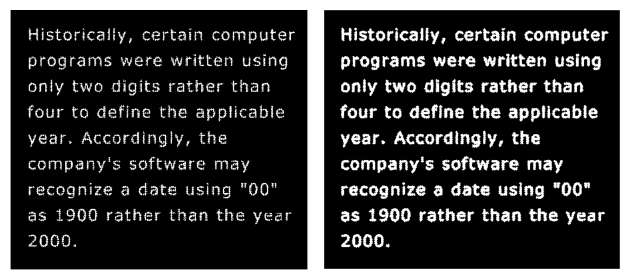

In [19]:
element = np.array([[0, 1, 0], 
                    [1, 1, 1], 
                    [0, 1, 0]], dtype=bool)

dilated = dilate(broken_text, element)

show_side_by_side([broken_text, dilated])

### 2)

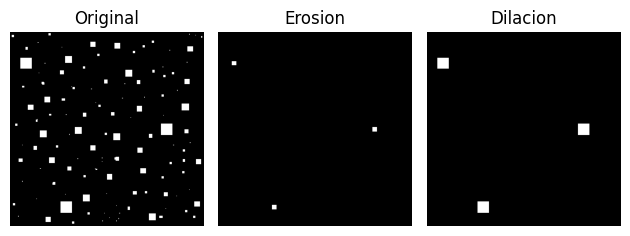

In [20]:
element = np.ones((13, 13), dtype=bool)

eroded = erode(noisy_squares, element)
dilated = dilate(eroded, element)

show_side_by_side([noisy_squares, eroded, dilated], ["Original", "Erosion", "Dilacion"])

### 3)

https://colab.research.google.com/github/bautistasch/Procesamiento-de-Imagenes/blob/main/TP7/interactive-3.ipynb

### 4)